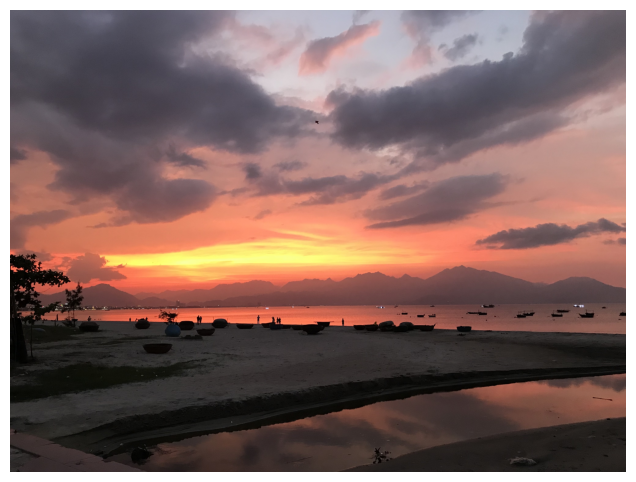

In [2]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Load the image using OpenCV
img = cv2.imread('D:\Gitrepo\CPV\IMG_4.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)
plt.axis('off')  # Hide axes
plt.show()

# 1. The Gray World Assumption

In [ ]:
import cv2 
import numpy as np

def gray_world_white_balance(img):
    # Calculate the avarage of each channel
    avg_b = np.mean(img[:, :, 0])
    avg_g = np.mean(img[:, :, 1])
    avg_r = np.mean(img[:, :, 2])

    # Calculate the overall average
    avg = (avg_b + avg_g + avg_r) / 3

    # Calculate the scaling factors for each channel
    scale_b = avg / avg_b
    scale_g = avg / avg_g
    scale_r = avg / avg_r

    # Apply the scaling factors to each channel
    balanced_img = np.zeros_like(img, dtype=np.float32)
    balanced_img[:, :, 0] = img[:, :, 0] * scale_b
    balanced_img[:, :, 1] = img[:, :, 1] * scale_g
    balanced_img[:, :, 2] = img[:, :, 2] * scale_r

    # Clip the values to be in the valid range [0, 255] and convert to uint8
    balanced_img = np.clip(balanced_img, 0, 255).astype(np.uint8)  

    return balanced_img


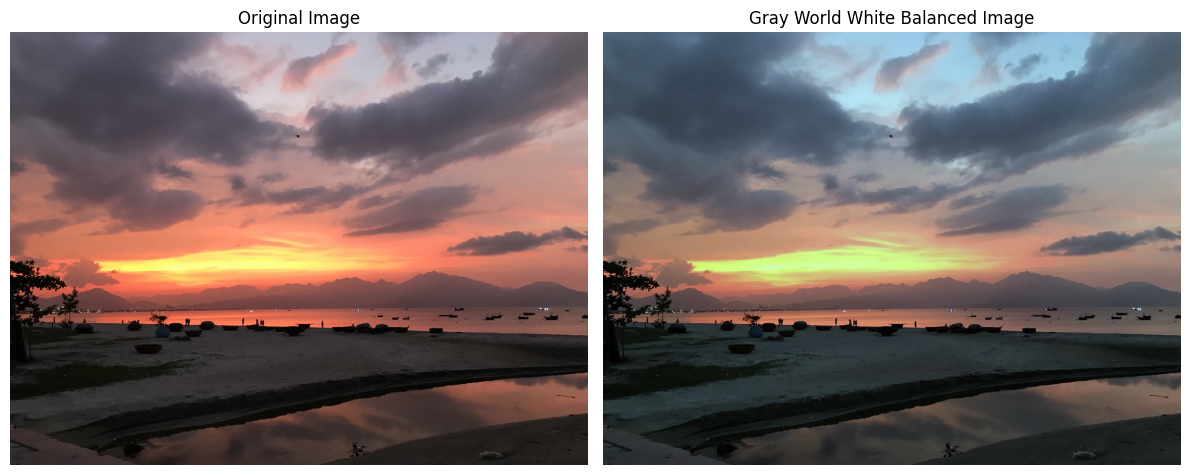

In [4]:
# Apply the Gray World white balancing
balanced_img = gray_world_white_balance(img)

# Convert both images from BGR to RGB for displaying with matplotlib
rgb_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_balanced = cv2.cvtColor(balanced_img, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(rgb_original)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Display the white-balanced image
plt.subplot(1, 2, 2)
plt.imshow(rgb_balanced)
plt.title('Gray World White Balanced Image')
plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# 2. The White Patch Algorithm

In [5]:
def white_patch_white_balance(img, percentile=99):
    """
    Applies the White Patch algorithm with percentile adjustment.
    
    Args:
        img: A BGR image as a NumPy array
        percentile: Percentile value to use (default=99)
    """
    # Find the percentile value in each channel
    max_b = np.percentile(img[:, :, 0], percentile)
    max_g = np.percentile(img[:, :, 1], percentile)
    max_r = np.percentile(img[:, :, 2], percentile)
    
    # Define the target value (slightly lower than 255 to prevent oversaturation)
    max_val = 250.0
    
    # Calculate scaling factors
    scale_b = max_val / max_b
    scale_g = max_val / max_g
    scale_r = max_val / max_r
    
    # Apply scaling
    balanced_img = np.zeros_like(img, dtype=np.float32)
    balanced_img[:, :, 0] = np.clip(img[:, :, 0] * scale_b, 0, 255)
    balanced_img[:, :, 1] = np.clip(img[:, :, 1] * scale_g, 0, 255)
    balanced_img[:, :, 2] = np.clip(img[:, :, 2] * scale_r, 0, 255)
    
    return balanced_img.astype(np.uint8)

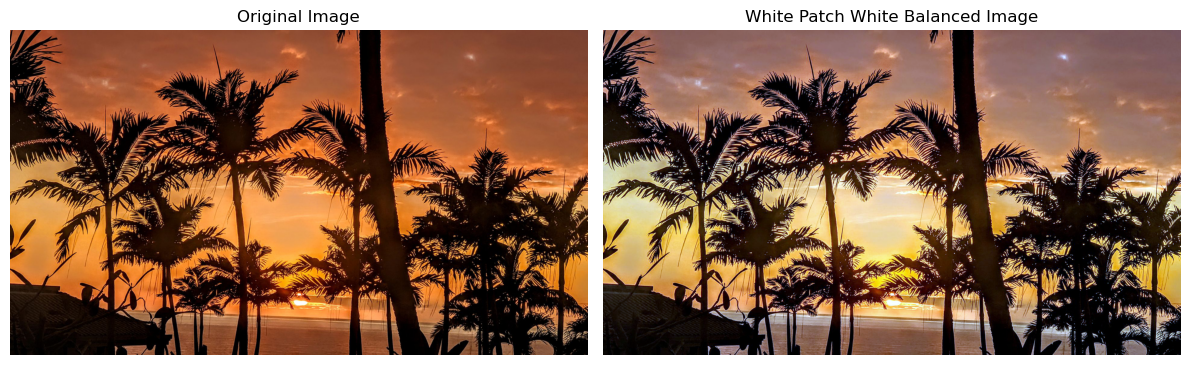

In [6]:
# Apply the White Patch white balancing
balanced_img = white_patch_white_balance(img)

# Convert both images from BGR to RGB for displaying with matplotlib
rgb_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_balanced = cv2.cvtColor(balanced_img, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(rgb_original)
plt.title('Original Image')
plt.axis('off')  # Hide axes

# Display the white-balanced image
plt.subplot(1, 2, 2)
plt.imshow(rgb_balanced)
plt.title('White Patch White Balanced Image')
plt.axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()